# 标注器

In [1]:
import nltk

In [2]:
text = nltk.word_tokenize("and now for something completely different")
nltk.pos_tag(text)

[('and', 'CC'),
 ('now', 'RB'),
 ('for', 'IN'),
 ('something', 'NN'),
 ('completely', 'RB'),
 ('different', 'JJ')]

In [3]:
text = nltk.Text(w.lower() for w in nltk.corpus.brown.words())
text.similar('woman')  # 找出和当前词同是名词的词

man time day year car moment world house family child country boy
state job place way war girl work word


In [4]:
text.similar('bought')  # 找出和当前词同是动词的词

made said done put had seen found given left heard was been brought
set got that took in told felt


In [5]:
text.similar('over')

in on to of and for with from at by that into as up out down through
is all about


# 标注语料库

In [6]:
tagged_token = nltk.tag.str2tuple('fly/NN')
tagged_token

('fly', 'NN')

In [7]:
tagged_token[0]

'fly'

In [8]:
s = 'fly/NN The/AT said/VBD'
[nltk.tag.str2tuple(t) for t in s.split()]

[('fly', 'NN'), ('The', 'AT'), ('said', 'VBD')]

In [9]:
nltk.corpus.brown.tagged_words()

[('The', 'AT'), ('Fulton', 'NP-TL'), ...]

In [10]:
# nltk.corpus.brown.tagged_words(simplify_tags=True)  # 部分语料库使用该方式
nltk.corpus.brown.tagged_words(tagset='universal')

[('The', 'DET'), ('Fulton', 'NOUN'), ...]

In [11]:
nltk.corpus.nps_chat.tagged_words() 

[('now', 'RB'), ('im', 'PRP'), ('left', 'VBD'), ...]

In [12]:
nltk.corpus.conll2000.tagged_words()

[('Confidence', 'NN'), ('in', 'IN'), ('the', 'DT'), ...]

In [13]:
nltk.corpus.treebank.tagged_words()

[('Pierre', 'NNP'), ('Vinken', 'NNP'), (',', ','), ...]

In [14]:
nltk.corpus.sinica_treebank.tagged_words()[:10]

[('一', 'Neu'),
 ('友情', 'Nad'),
 ('嘉珍', 'Nba'),
 ('和', 'Caa'),
 ('我', 'Nhaa'),
 ('住在', 'VC1'),
 ('同一條', 'DM'),
 ('巷子', 'Nab'),
 ('我們', 'Nhaa'),
 ('是', 'V_11')]

In [15]:
from nltk.corpus import brown

In [16]:
brown_news_tagged = brown.tagged_words(categories='news', tagset='universal')
tag_fd = nltk.FreqDist(tag for (word, tag) in brown_news_tagged)
tag_fd

FreqDist({'NOUN': 30654, 'VERB': 14399, 'ADP': 12355, '.': 11928, 'DET': 11389, 'ADJ': 6706, 'ADV': 3349, 'CONJ': 2717, 'PRON': 2535, 'PRT': 2264, ...})

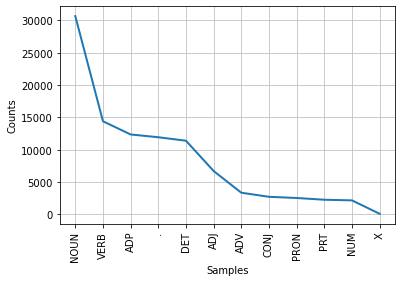

In [17]:
tag_fd.plot(cumulative=False)

# 名词
N： 普通名词

NP：专有名词

In [46]:
brown_news_tagged = brown.tagged_words()
word_tag_pairs = nltk.bigrams(brown_news_tagged)  # 获取相邻词对
word_tag_pairs

<generator object bigrams at 0x000001955C89E510>

In [34]:
[(a, b) for (a, b) in word_tag_pairs][:10]

[(('The', 'AT'), ('Fulton', 'NP-TL')),
 (('Fulton', 'NP-TL'), ('County', 'NN-TL')),
 (('County', 'NN-TL'), ('Grand', 'JJ-TL')),
 (('Grand', 'JJ-TL'), ('Jury', 'NN-TL')),
 (('Jury', 'NN-TL'), ('said', 'VBD')),
 (('said', 'VBD'), ('Friday', 'NR')),
 (('Friday', 'NR'), ('an', 'AT')),
 (('an', 'AT'), ('investigation', 'NN')),
 (('investigation', 'NN'), ('of', 'IN')),
 (('of', 'IN'), ("Atlanta's", 'NP$'))]

In [41]:
[(b[1], type(b[1]), b[1][0]) for (a, b) in word_tag_pairs][:3]

[('JJ-TL', str, 'J'), ('NN-TL', str, 'N'), ('VBD', str, 'V')]

In [47]:
# 找出名词一般在哪些词性后面
list(nltk.FreqDist(a[1] for (a, b) in word_tag_pairs if b[1][0] == 'N'))[:10]

['AT', 'JJ', 'IN', 'NN', 'PP$', 'NP', 'CC', ',', '.', 'CD']

In [65]:
# 找出最频繁的名词
def findtags(tag_prefix, tagged_text):
    cfd = nltk.ConditionalFreqDist((tag, word) for (word, tag) in tagged_text
                                  if tag.startswith(tag_prefix))
    return dict((tag, list(cfd[tag].keys())[:5]) for tag in cfd.conditions())

In [66]:
tagdict = findtags('NN', nltk.corpus.brown.tagged_words(categories='news'))
for tag in sorted(tagdict):
    print(tag, tagdict[tag])

NN ['investigation', 'primary', 'election', 'evidence', 'place']
NN$ ["ordinary's", "court's", "mayor's", "wife's", "governor's"]
NN$-HL ["Golf's", "Navy's"]
NN$-TL ["Department's", "Commissioner's", "President's", "Party's", "Mayor's"]
NN-HL ['Merger', 'jail', 'Construction', 'fund', 'sp.']
NN-NC ['ova', 'eva', 'aya']
NN-TL ['County', 'Jury', 'City', 'Committee', 'Court']
NN-TL-HL ['Mayor', 'Commissioner', 'City', 'Oak', 'Grove']
NNS ['irregularities', 'presentments', 'thanks', 'reports', 'voters']
NNS$ ["taxpayers'", "children's", "members'", "women's", "years'"]
NNS$-HL ["Dealers'", "Idols'"]
NNS$-TL ["States'", "Women's", "Princes'", "Bombers'", "Falcons'"]
NNS-HL ['Wards', 'deputies', 'bonds', 'aspects', 'Decisions']
NNS-TL ['Police', 'Roads', 'Legislatures', 'Bankers', 'Reps.']
NNS-TL-HL ['Nations']


# 动词

In [49]:
# 新闻文本中最常见的动词
wsj = nltk.corpus.treebank.tagged_words(tagset='universal')
word_tag_fd = nltk.FreqDist(wsj)
[word + "/" + tag for (word, tag) in word_tag_fd if tag.startswith('V')][:10]

['is/VERB',
 'said/VERB',
 'was/VERB',
 'are/VERB',
 'be/VERB',
 'has/VERB',
 'have/VERB',
 'will/VERB',
 'says/VERB',
 'would/VERB']

In [50]:
# 给定词的标记的频率顺序列表
cfd1 = nltk.ConditionalFreqDist(wsj)
cfd1['yield'].keys()

dict_keys(['NOUN', 'VERB'])

In [55]:
cfd2 = nltk.ConditionalFreqDist((tag, word) for (word, tag) in wsj)
list(cfd2['VERB'].keys())[:10]

['will',
 'join',
 'is',
 'publishing',
 'was',
 'named',
 'used',
 'make',
 'has',
 'caused']

In [58]:
temp = wsj.index(('kicked', 'VERB'))
temp

8232

In [60]:
wsj[temp]

('kicked', 'VERB')

# 已标注语料库

In [69]:
# 查看often后面的词
brown_learned_text = brown.words(categories='learned')
sorted(set(b for (a, b) in nltk.bigrams(brown_learned_text) if a == 'often'))

[',',
 '.',
 'accomplished',
 'analytically',
 'appear',
 'apt',
 'associated',
 'assuming',
 'became',
 'become',
 'been',
 'began',
 'call',
 'called',
 'carefully',
 'chose',
 'classified',
 'colorful',
 'composed',
 'contain',
 'differed',
 'difficult',
 'encountered',
 'enough',
 'equate',
 'extremely',
 'found',
 'happens',
 'have',
 'ignored',
 'in',
 'involved',
 'more',
 'needed',
 'nightly',
 'observed',
 'of',
 'on',
 'out',
 'quite',
 'represent',
 'responsible',
 'revamped',
 'seclude',
 'set',
 'shortened',
 'sing',
 'sounded',
 'stated',
 'still',
 'sung',
 'supported',
 'than',
 'to',
 'when',
 'work']

In [70]:
brown_lrnd_tagged = brown.tagged_words(categories='learned', tagset='universal')
tags = [b[1] for (a, b) in nltk.bigrams(brown_lrnd_tagged) if a[0] == 'often']
fd = nltk.FreqDist(tags)
fd.tabulate()

VERB  ADV  ADP  ADJ    .  PRT 
  37    8    7    6    4    2 


In [78]:
# 使用POS标记寻找三词短语
from nltk.corpus import brown
def process(sentence):
    for (w1, t1), (w2, t2), (w3, t3) in nltk.trigrams(sentence):
        if (t1.startswith('V') and t2 == 'TO' and t3.startswith('V')):
            print(w1, w2, w3)
            
for tagged_sent in brown.tagged_sents()[:100]:
    process(tagged_sent)

combined to achieve
continue to place
serve to protect
wanted to wait
allowed to place
expected to become
expected to approve
expected to make
intends to make
seek to set
like to see


In [79]:
freq = nltk.defaultdict(int)
freq['colorless'] = 4
freq['ideas']

0

In [80]:
pos = nltk.defaultdict(list)
pos['sleep'] = ['N', 'V']
pos['ideas']

[]

In [81]:
freq = nltk.defaultdict(lambda: 'N')
freq['colorless'] = 'ADJ'
freq['ideas']

'N'

In [86]:
counts = nltk.defaultdict(int)
for (word, tag) in brown.tagged_words(categories='news'):
    counts[tag] += 1
    
from operator import itemgetter
[(t, c) for t, c in sorted(counts.items(), key=itemgetter(1), reverse=True)][:10]

[('NN', 13162),
 ('IN', 10616),
 ('AT', 8893),
 ('NP', 6866),
 (',', 5133),
 ('NNS', 5066),
 ('.', 4452),
 ('JJ', 4392),
 ('CC', 2664),
 ('VBD', 2524)]

# 默认标注器

In [87]:
brown_tagged_sents = brown.tagged_sents(categories='news')
brown_sents = brown.sents(categories='news')

In [88]:
tags = [tag for (word, tag) in brown.tagged_words(categories='news')]
nltk.FreqDist(tags).max()

'NN'

In [89]:
raw = 'i do not like green eggs and ham, i do not like them sam i am!'
tokens = nltk.word_tokenize(raw)
default_tagger = nltk.DefaultTagger('NN')
default_tagger.tag(tokens)

[('i', 'NN'),
 ('do', 'NN'),
 ('not', 'NN'),
 ('like', 'NN'),
 ('green', 'NN'),
 ('eggs', 'NN'),
 ('and', 'NN'),
 ('ham', 'NN'),
 (',', 'NN'),
 ('i', 'NN'),
 ('do', 'NN'),
 ('not', 'NN'),
 ('like', 'NN'),
 ('them', 'NN'),
 ('sam', 'NN'),
 ('i', 'NN'),
 ('am', 'NN'),
 ('!', 'NN')]

In [90]:
default_tagger.evaluate(brown_tagged_sents)

0.13089484257215028

# 正则表达式标注器

In [91]:
patterns = [
    (r'.*ing$', 'VBG'),
    (r'.*ed$', 'VBD'),
    (r'.*es$', 'VBZ'),
    (r'.*ould$', 'MD'),
    (r'.*\'s$', 'NN$'),
    (r'.*s$', 'NNS'),
    (r'^-?[0-9]+(.[0-9]+)?$', 'CD'),
    (r'.*', 'NN')
]

regexp_tagger = nltk.RegexpTagger(patterns)
regexp_tagger.tag(brown_sents[3])

[('``', 'NN'),
 ('Only', 'NN'),
 ('a', 'NN'),
 ('relative', 'NN'),
 ('handful', 'NN'),
 ('of', 'NN'),
 ('such', 'NN'),
 ('reports', 'NNS'),
 ('was', 'NNS'),
 ('received', 'VBD'),
 ("''", 'NN'),
 (',', 'NN'),
 ('the', 'NN'),
 ('jury', 'NN'),
 ('said', 'NN'),
 (',', 'NN'),
 ('``', 'NN'),
 ('considering', 'VBG'),
 ('the', 'NN'),
 ('widespread', 'NN'),
 ('interest', 'NN'),
 ('in', 'NN'),
 ('the', 'NN'),
 ('election', 'NN'),
 (',', 'NN'),
 ('the', 'NN'),
 ('number', 'NN'),
 ('of', 'NN'),
 ('voters', 'NNS'),
 ('and', 'NN'),
 ('the', 'NN'),
 ('size', 'NN'),
 ('of', 'NN'),
 ('this', 'NNS'),
 ('city', 'NN'),
 ("''", 'NN'),
 ('.', 'NN')]

In [92]:
regexp_tagger.evaluate(brown_tagged_sents)

0.20326391789486245

# 查询标注器

In [94]:
fd = nltk.FreqDist(brown.words(categories='news'))  # 统计词频
cfd = nltk.ConditionalFreqDist(brown.tagged_words(categories='news'))  # 词 - 词性 统计

most_freq_words = list(fd.keys())[:100]  # 最高频的前100词
likely_tags = dict((word, cfd[word].max()) for word in most_freq_words)  # 高频词及高频词性

baseline_tagger = nltk.UnigramTagger(model=likely_tags)

baseline_tagger.evaluate(brown_tagged_sents)

0.3329355371243312

In [101]:
sent = brown.sents(categories='news')[3]
baseline_tagger.tag(sent)

[('``', '``'),
 ('Only', 'RB'),
 ('a', 'AT'),
 ('relative', 'JJ'),
 ('handful', 'NN'),
 ('of', 'IN'),
 ('such', 'JJ'),
 ('reports', 'NNS'),
 ('was', 'BEDZ'),
 ('received', 'VBD'),
 ("''", "''"),
 (',', ','),
 ('the', 'AT'),
 ('jury', 'NN'),
 ('said', 'VBD'),
 (',', ','),
 ('``', '``'),
 ('considering', 'IN'),
 ('the', 'AT'),
 ('widespread', 'JJ'),
 ('interest', 'NN'),
 ('in', 'IN'),
 ('the', 'AT'),
 ('election', 'NN'),
 (',', ','),
 ('the', 'AT'),
 ('number', 'NN'),
 ('of', 'IN'),
 ('voters', 'NNS'),
 ('and', 'CC'),
 ('the', 'AT'),
 ('size', 'NN'),
 ('of', 'IN'),
 ('this', 'DT'),
 ('city', 'NN'),
 ("''", "''"),
 ('.', '.')]

In [102]:
# 从上可知有些词被标注为空，因为我们需要将未查到的词性标注为默认的
baseline_tagger = nltk.UnigramTagger(model=likely_tags, backoff=nltk.DefaultTagger('NN'))

In [103]:
def performance(cfd, wordlist):
    lt = dict((word, cfd[word].max()) for word in wordlist)
    baseline_tagger = nltk.UnigramTagger(model=lt,
                                        backoff=nltk.DefaultTagger('NN'))
    return baseline_tagger.evaluate(brown.tagged_sents(categories='news'))

def display():
    import pylab
    words_by_freq = list(nltk.FreqDist(brown.words(categories='news')))
    cfd = nltk.ConditionalFreqDist(brown.tagged_words(categories='news'))
    sizes = 2 ** pylab.arange(15)
    perfs = [performance(cfd, words_by_freq[:size]) for size in sizes]
    pylab.plot(sizes, perfs, '-bo')
    pylab.title('Lookup Tagger Performance with Varying Model Size')
    pylab.xlabel('Model Size')
    pylab.ylabel('Performance')
    pylab.show()

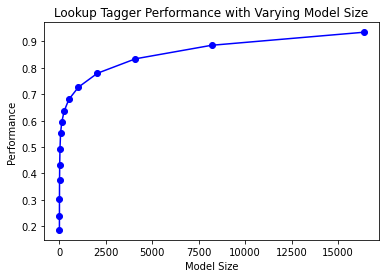

In [104]:
display()

# N-gram标注

## 一元标注
基于简单的统计算法，对每个标识符分配这个独特的标识符最有可能的标记

即对每一个词统计频率最高的词性频率

In [107]:
brown_tagged_sents = brown.tagged_sents(categories='news')
brown_sents = brown.sents(categories='news')

unigram_tagger = nltk.UnigramTagger(brown_tagged_sents)  # 一元标注
unigram_tagger.tag(brown_sents[2007])

[('Various', 'JJ'),
 ('of', 'IN'),
 ('the', 'AT'),
 ('apartments', 'NNS'),
 ('are', 'BER'),
 ('of', 'IN'),
 ('the', 'AT'),
 ('terrace', 'NN'),
 ('type', 'NN'),
 (',', ','),
 ('being', 'BEG'),
 ('on', 'IN'),
 ('the', 'AT'),
 ('ground', 'NN'),
 ('floor', 'NN'),
 ('so', 'QL'),
 ('that', 'CS'),
 ('entrance', 'NN'),
 ('is', 'BEZ'),
 ('direct', 'JJ'),
 ('.', '.')]

In [108]:
unigram_tagger.evaluate(brown_tagged_sents)

0.9349006503968017

In [109]:
# 分离训练和测试数据
size = int(len(brown_tagged_sents) * 0.9)
size

4160

In [110]:
train_sents = brown_tagged_sents[:size]
test_sents = brown_tagged_sents[size:]

unigram_tagger = nltk.UnigramTagger(train_sents)

unigram_tagger.evaluate(test_sents)

0.8121200039868434

## n-gram标注器
挑选在给定上下文中最可能的标记

上下文：当前词和它前面的n-1个标识符的词性标记（不包含前一个句子）

当标注的数据在训练数据中不存在且占比较高时，被称为数据稀疏问题，在NLP中是普遍的。因此在研究结果的精度和覆盖范围之间需要有一个权衡

In [111]:
bigram_tagger = nltk.BigramTagger(train_sents)  # 二元标注（未出现的不会统计）
bigram_tagger.tag(brown_sents[2007])

[('Various', 'JJ'),
 ('of', 'IN'),
 ('the', 'AT'),
 ('apartments', 'NNS'),
 ('are', 'BER'),
 ('of', 'IN'),
 ('the', 'AT'),
 ('terrace', 'NN'),
 ('type', 'NN'),
 (',', ','),
 ('being', 'BEG'),
 ('on', 'IN'),
 ('the', 'AT'),
 ('ground', 'NN'),
 ('floor', 'NN'),
 ('so', 'CS'),
 ('that', 'CS'),
 ('entrance', 'NN'),
 ('is', 'BEZ'),
 ('direct', 'JJ'),
 ('.', '.')]

In [112]:
unseen_sent = brown_sents[4203]
bigram_tagger.tag(unseen_sent)

[('The', 'AT'),
 ('population', 'NN'),
 ('of', 'IN'),
 ('the', 'AT'),
 ('Congo', 'NP'),
 ('is', 'BEZ'),
 ('13.5', None),
 ('million', None),
 (',', None),
 ('divided', None),
 ('into', None),
 ('at', None),
 ('least', None),
 ('seven', None),
 ('major', None),
 ('``', None),
 ('culture', None),
 ('clusters', None),
 ("''", None),
 ('and', None),
 ('innumerable', None),
 ('tribes', None),
 ('speaking', None),
 ('400', None),
 ('separate', None),
 ('dialects', None),
 ('.', None)]

In [113]:
bigram_tagger.evaluate(test_sents)

0.10206319146815508

# 组合标注器
如首先使用二元标注器，否则使用一元标注器，最后使用默认标注器

In [114]:
t0 = nltk.DefaultTagger('NN')
t1 = nltk.UnigramTagger(train_sents, backoff=t0)
t2 = nltk.BigramTagger(train_sents, backoff=t1)
t2.evaluate(test_sents)

0.8452108043456593

In [120]:
# 将会丢弃那些只看到一次或两次的上下文
t2 = nltk.BigramTagger(train_sents, cutoff=2, backoff=t1)
t2.evaluate(test_sents)

0.8424200139539519

# 存储标注器

In [122]:
from pickle import dump
from pickle import load

In [123]:
output = open('t2.pkl', 'wb')
dump(t2, output, -1)
output.close()

In [125]:
inputs = open('t2.pkl', 'rb')
tagger = load(inputs)
inputs.close()

In [126]:
text = '''
One notable effort in increasing the interoperability of biomedical ontologies has been the creation of logical definitions[71]. This is an initiative 
'''
tokens = text.split()
tagger.tag(tokens)

[('One', 'CD'),
 ('notable', 'JJ'),
 ('effort', 'NN'),
 ('in', 'IN'),
 ('increasing', 'VBG'),
 ('the', 'AT'),
 ('interoperability', 'NN'),
 ('of', 'IN'),
 ('biomedical', 'NN'),
 ('ontologies', 'NN'),
 ('has', 'HVZ'),
 ('been', 'BEN'),
 ('the', 'AT'),
 ('creation', 'NN'),
 ('of', 'IN'),
 ('logical', 'JJ'),
 ('definitions[71].', 'NN'),
 ('This', 'DT'),
 ('is', 'BEZ'),
 ('an', 'AT'),
 ('initiative', 'NN')]

# 性能限制

In [158]:
cfd = nltk.ConditionalFreqDist(((x[1], y[1], z[0]), z[1])
                              for sent in brown_tagged_sents
                              for x, y, z in nltk.trigrams(sent))

ambiguout_contexts = [c for c in cfd.conditions() if len(cfd[c]) > 1]
ambiguout_contexts[:10]

[('NN', "''", 'that'),
 ('NN', 'NNS', 'that'),
 ('AT', 'NN-TL', 'of'),
 ('NP', 'NP', 'to'),
 ('NN', 'IN', 'such'),
 ('NN', 'VBD', 'it'),
 ('VB', '``', 'to'),
 ('CC', 'VBN', 'to'),
 ('NN', 'VBD', 'on'),
 ('WDT', 'VB', 'to')]

In [165]:
sum(cfd[c].N() for c in ambiguout_contexts) / cfd.N()

0.049297702068029296

可知有1/20的trigrams是有歧义的。给定当前单词及其前两个标记，根据训练数据，在5%的情况下，有一个以上的标记可能合理的分配给当前词。假设我们总是挑选在这种含糊不清的上下文中最可能的标记，可以得出trigram标注器性能的下界

训练数据中的歧义导致标注器性能的上限

In [168]:
# 另一种查看标注错误的方法：查看混淆矩阵
test_tags = [tag for sent in brown.sents(categories='editorial')
            for (word, tag) in t2.tag(sent)]
gold_tags = [tag for (word, tag) in brown.tagged_words(categories='editorial')]

t = nltk.ConfusionMatrix(gold_tags, test_tags)  # 混淆矩阵

In [183]:
# # 查看与写入文件
# print(str(t))
# f = open('test.txt', 'w')
# l = [w[:100] for w in str(t).split('\n')]
# [f.write(ls+"\n") for ls in l]
# f.close()

## 跨句子边界标注
对n-gram标注器用于句子的第一个词时，通常是前面句子的最后一个词或标点符号，这对于该词的类别是没用关系的，因此使用跨句子边界标注方式

In [185]:
brown_tagged_sents = brown.tagged_sents(categories='news')
brown_sents = brown.sents(categories='news')

size = int(len(brown_tagged_sents) * 0.9)
train_sents = brown_tagged_sents[:size]
test_sents = brown_tagged_sents[size:]

t0 = nltk.DefaultTagger('NN')
t1 = nltk.UnigramTagger(train_sents, backoff=t0)
t2 = nltk.BigramTagger(train_sents, backoff=t1)

t2.evaluate(test_sents)

0.8452108043456593

# 基于转换的标注
## Brill标注
思想：猜每个词的标记，然后返回和修复错误。这种方式下，Brill标注器陆续将一个不良标注的文本转换成一个更好的。同样是有监督的学习方法，不过和n-gram不同的是，它不计数观察结果，只编制一个转换修正规则的链表。

以画画类比：以大笔画开始，然后修复细节，一点点的修改

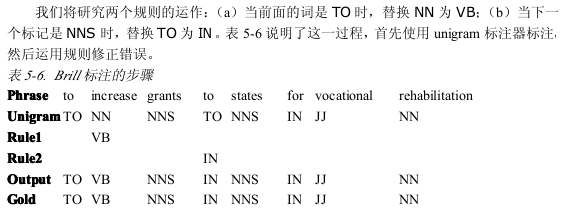

In [190]:
from nltk.tbl import demo as brill
brill.demo()

Loading tagged data from treebank... 
Read testing data (200 sents/5251 wds)
Read training data (800 sents/19933 wds)
Read baseline data (800 sents/19933 wds) [reused the training set]
Trained baseline tagger
    Accuracy on test set: 0.8366
Training tbl tagger...
TBL train (fast) (seqs: 800; tokens: 19933; tpls: 24; min score: 3; min acc: None)
Finding initial useful rules...
    Found 12799 useful rules.

           B      |
   S   F   r   O  |        Score = Fixed - Broken
   c   i   o   t  |  R     Fixed = num tags changed incorrect -> correct
   o   x   k   h  |  u     Broken = num tags changed correct -> incorrect
   r   e   e   e  |  l     Other = num tags changed incorrect -> incorrect
   e   d   n   r  |  e
------------------+-------------------------------------------------------
  23  23   0   0  | POS->VBZ if Pos:PRP@[-2,-1]
  18  19   1   0  | NN->VB if Pos:-NONE-@[-2] & Pos:TO@[-1]
  14  14   0   0  | VBP->VB if Pos:MD@[-2,-1]
  12  12   0   0  | VBP->VB if Pos:TO@[-1]
  

# 确定词性
## 形态学线索
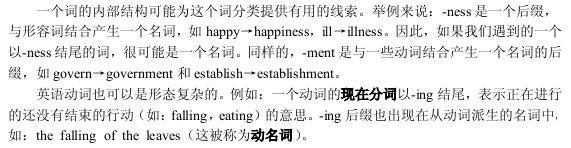

## 句法线索
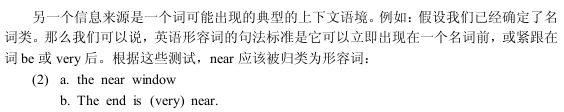

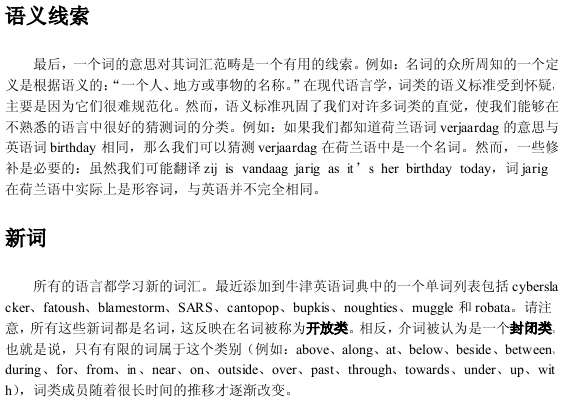

没有正确的方式来分配标记，只有根据目标不同或多或少有用的方法